<h1>PyQuant</h1>
<p>This is a jupyter notebook demo of the pyquant library. Do direct any suggestions / requests to <b>brennanmato@gmail.com</b> </p>
<h3> Setup </h3>
<p><b>Note: This demo requires matplotlib</b></p>
<p>
    Copy the folder from the repo into a folder in Lib named pyquant. You can find your python installation by running the code in the cell below:
</p>

In [1]:
import sys
print(sys.executable)

c:\users\brennan\appdata\local\programs\python\python35-32\python.exe


<h3>Logs</h3>
<p>
    The logs are in dictionary form, with the following keys:
</p>
<br>
0 period - Time period <br>
1 type - Whether an executed trade is a LONG, SHORT, STOP LOSS, TAKE GAIN, etc. <br>
2 volume - Number of stocks in trade <br>
3 current_price - Price of the stock at the time of trade <br>
4 entry_price - Price of stock when a trade was entered<br>
5 starting_balance - Balance before the trade was executed<br>
6 end_balance - Balance after the executed trade <br>
7 total_equity - Cash on hand plus current value of the stocks held <br>
8 held - Number of stocks held <br>
9 win_count - Number of exits with a profit <br>
10 loss_count - Number of exits with a loss <br>

[26.129999, 25.719999, 25.959999, 26.4, 26.52, 26.42, 26.799999, 26.049999, 26.219999, 26.41, 26.66, 26.860001, 26.450001, 26.08, 26.08, 26.370001, 26.77, 27.16, 27.1]


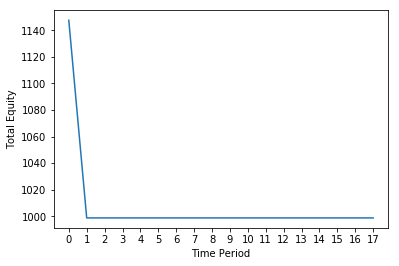

In [23]:
import pyquant
import matplotlib.pyplot as plt

hold_and_wait = pyquant.Trader(0.1,1000)
hold_and_wait.add_stock_data('CSV.csv')

dictionary = {
    'TRADE_IT': 1,
    'Entry Price': 26.13,
    'Stop Loss': 26,
    'Target Price 1': 26.15,
    'Target Price 2': 26.8,
    'Type of Trade': 'LONG',
    'Pct of Available Cash': 0.15,
    'TP1 vs TP2 Split': 0.5,
    }

hold_and_wait.execute_hold_and_wait(dictionary,hold_and_wait.data,hold_and_wait.balance)

equity_data = [ entry['total_equity'] for entry in hold_and_wait.log ] 
tp_data = [ entry['period'] for entry in hold_and_wait.log ] 

plt.plot(equity_data)
plt.xticks(tp_data)
plt.ylabel('Total Equity')
plt.xlabel('Time Period')
plt.show()

[26.129999, 25.719999, 25.959999, 26.4, 26.52, 26.42, 26.799999, 26.049999, 26.219999, 26.41, 26.66, 26.860001, 26.450001, 26.08, 26.08, 26.370001, 26.77, 27.16, 27.1]


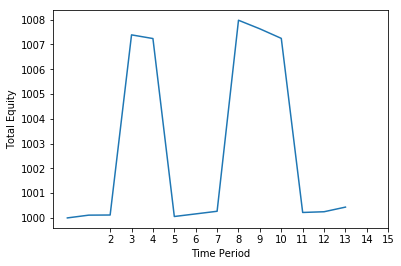

In [22]:
import pyquant
trader = pyquant.Trader(0.1,1000)
trader.add_stock_data('CSV.csv')
trader.signals = pyquant.aroon_signals(trader.data, 2, 0.8,0.9)
trader.execute_trades()

equity_data = [ entry['total_equity'] for entry in trader.log ] 
tp_data = [ entry['period'] for entry in trader.log ] 

plt.plot(equity_data)
plt.xticks(tp_data)
plt.ylabel('Total Equity')
plt.xlabel('Time Period')
plt.show()

